In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
%matplotlib inline

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [113]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = 10

<function matplotlib.pyplot.show(*args, **kw)>

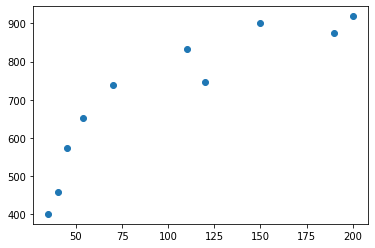

In [114]:
plt.scatter(X, y)
plt.show

In [115]:
b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [116]:
a = np.mean(y) - b*np.mean(X)
a

444.1773573243596

С использованием intercept

In [117]:
y_hat = a + b*X

mse = ((y - y_hat)**2).sum() / n
mse

6470.414201176658

<function matplotlib.pyplot.show(*args, **kw)>

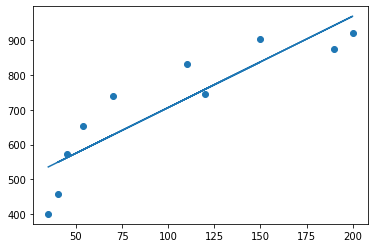

In [118]:
plt.scatter(X, y)
plt.plot(X, y_hat)
plt.show

Без intercept

In [119]:
y_hat_2 = b*X

mse = ((y - y_hat_2)**2).sum() / n
mse

203763.93896082853

<function matplotlib.pyplot.show(*args, **kw)>

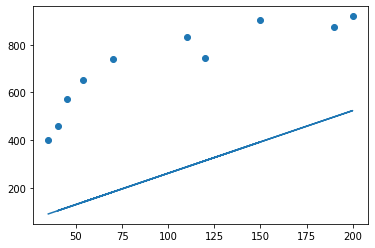

In [120]:
plt.scatter(X, y)
plt.plot(X, y_hat_2)
plt.show

### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [121]:
def mse_(B1,y=y,X=X,n=10):
    return np.sum((B1*X - y)**2) / n
    

In [122]:
alpha = 1e-6
B1 = 0.1

In [123]:
for i in range(1000):
    B1 -= alpha * (2/n) * np.sum((B1*X - y) * X)
    
    if i%100 == 0:
        print(f'iteration: {i}: B1 = {B1} mse = {mse_(B1)}')

iteration: 0: B1 = 0.25952808 mse = 493237.7212546963
iteration: 100: B1 = 5.54537842245223 mse = 58151.31823171113
iteration: 200: B1 = 5.868748638669329 mse = 56522.97550129376
iteration: 300: B1 = 5.888531320728348 mse = 56516.88130936019
iteration: 400: B1 = 5.8897415574471985 mse = 56516.85850140053
iteration: 500: B1 = 5.889815595583751 mse = 56516.858416040064
iteration: 600: B1 = 5.889820124983314 mse = 56516.85841572062
iteration: 700: B1 = 5.889820402076462 mse = 56516.85841571941
iteration: 800: B1 = 5.88982041902807 mse = 56516.8584157194
iteration: 900: B1 = 5.889820420065112 mse = 56516.85841571941


<function matplotlib.pyplot.show(*args, **kw)>

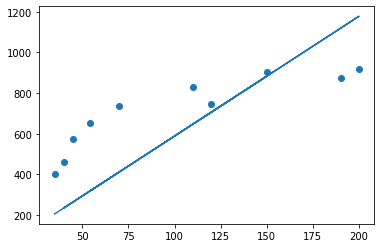

In [124]:
plt.scatter(X, y)
plt.plot(X, 5.8898204*X)
plt.show

### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Не помню, чтобы на вебинарах рассказывали про функциии Лапласа. Но если это Z-критерий, то он используется когда известно стандартное отклонение генеральной совокупности, а таблица распределения Стьюдента, когда не известно.

### *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [125]:
B0 = 0.1

In [126]:
def mse2_(B0, B1,y=y,X=X,n=10):
    return np.sum((B0 + B1*X - y)**2) / n

In [127]:
for i in range(3000):    
    B1 -= alpha * (2/n) * np.sum((B0 + B1*X - y) * X)  
    B0 = np.mean(y) - B1*np.mean(X)
    
    if i%500 == 0:
        print(f'iteration: {i}: B0 = {B0} B1 = {B1} mse = {mse2_(B0, B1)}')

iteration: 0: B0 = 112.67426579096457 B1 = 5.889800140128554 mse = 43821.368249852494
iteration: 500: B0 = 434.23576280378285 B1 = 2.7185822208699912 mse = 6504.006414959231
iteration: 1000: B0 = 443.87921439858945 B1 = 2.6234791479429043 mse = 6470.4444129036565
iteration: 1500: B0 = 444.16841618277493 B1 = 2.6206270593414698 mse = 6470.414228348088
iteration: 2000: B0 = 444.17708918446453 B1 = 2.6205415267804284 mse = 6470.414201201095
iteration: 2500: B0 = 444.1773492829922 B1 = 2.6205389617061905 mse = 6470.414201176681


<function matplotlib.pyplot.show(*args, **kw)>

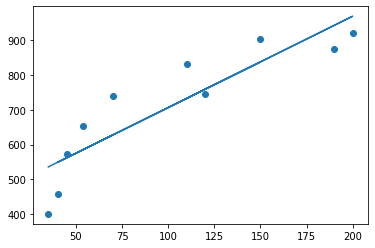

In [128]:
plt.scatter(X, y)
plt.plot(X, 444.177 + 2.62053*X)
plt.show